In [11]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [64]:
def display_image(image, title="image", subplot=None):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    if subplot:
        plt.subplot(subplot)
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')

In [65]:
vid = cv2.VideoCapture('ehd.mp4')

In [66]:
frames = 0
major_axis = []
minor_axis = []

In [67]:
ret, img = vid.read()

imgBlur = cv2.GaussianBlur(img, (21,21), 0)

ret, imgth = cv2.threshold(imgBlur, 100, 255, cv2.THRESH_BINARY)

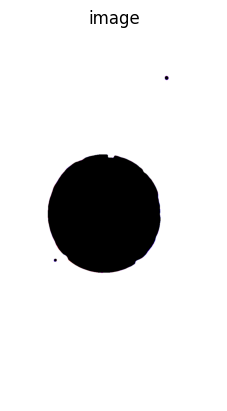

In [68]:
display_image(imgth)

In [69]:
while True:

    ret, img = vid.read()

    if not ret or frames>=20:
        break

    imgBlur = cv2.GaussianBlur(img, (21,21), 0)

    ret, imgth = cv2.threshold(imgBlur, 100, 255, cv2.THRESH_BINARY)

    edge = cv2.Canny(imgth, 100, 150)

    contours, hierarchy = cv2.findContours(edge, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    max_area = -1
    selected_contour = None
    
    if contours:
        print(f"num of contours {len(contours)}")
        
        for contour in contours:
            area = cv2.contourArea(contour)
            print(area)

num of contours 21
0.0
0.0
3.0
0.0
0.0
0.0
54.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
139.5
124.0
num of contours 14
3.0
0.0
61.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
141.0
133.5
num of contours 13
9.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
202.0
137.0
num of contours 11
2.5
48.5
0.0
0.0
0.0
0.0
1.0
0.0
50.0
96.5
140.0
num of contours 16
5.0
0.0
0.0
0.0
48.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
43.0
101.5
131.5
num of contours 14
0.0
0.0
3.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
108.0
98.5
141.0
num of contours 16
1.0
3.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
106.5
101.0
144.5
num of contours 13
0.0
2.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
105.0
108.5
138.0
num of contours 12
0.0
4.5
0.0
0.0
0.0
0.0
0.0
0.0
104.5
0.0
92.0
131.5
num of contours 22
0.0
0.0
0.0
3.0
0.0
55.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
40.0
0.0
89.5
134.5
num of contours 15
4.0
0.0
0.0
0.0
0.0
55.0
0.0
0.0
0.0
0.0
0.0
36.0
0.0
105.0
139.0
num of contours 10
0.0
0.0
3.0
0.0
0.0
2.0
0.0
90.0
92.5
143.5
nu

num of contours 21
max area = 139.5


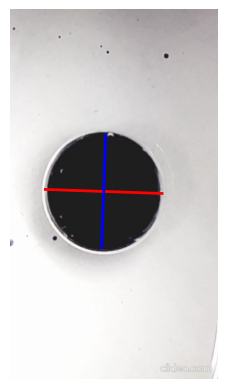

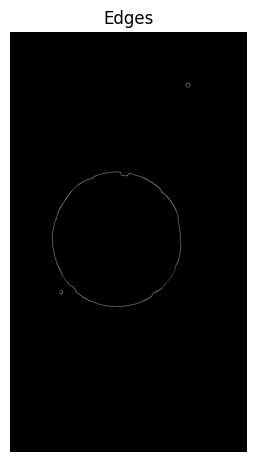

num of contours 14
max area = 141.0


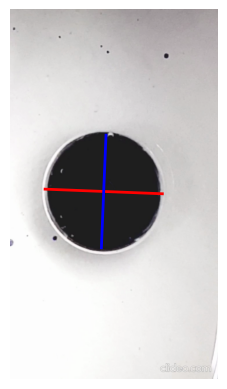

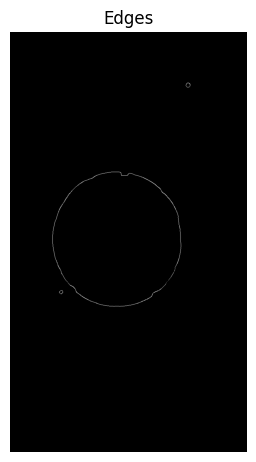

num of contours 13
max area = 202.0


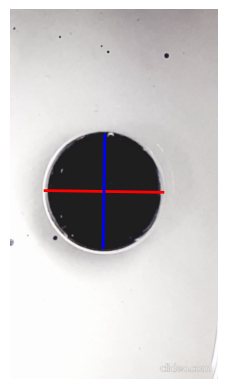

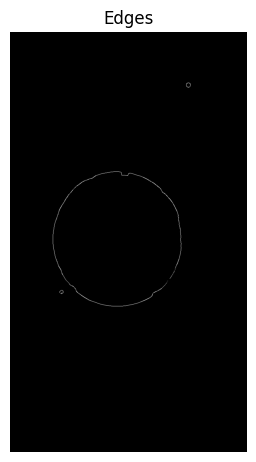

num of contours 11
max area = 140.0


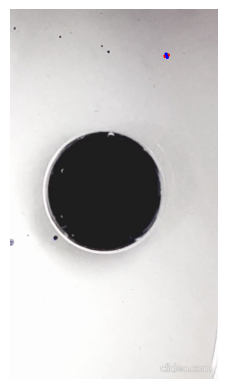

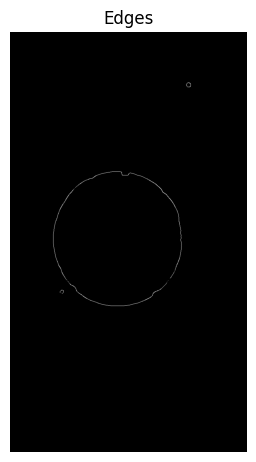

num of contours 16
max area = 131.5


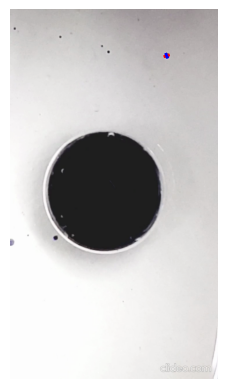

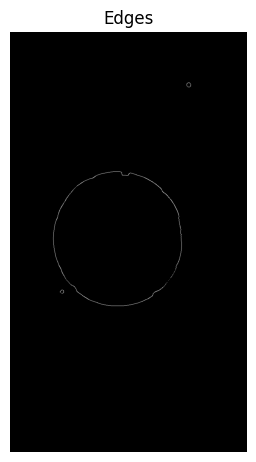

num of contours 14
max area = 141.0


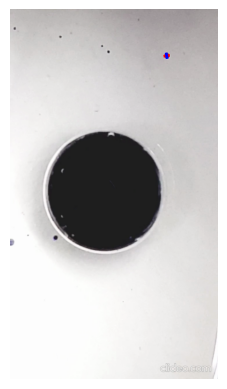

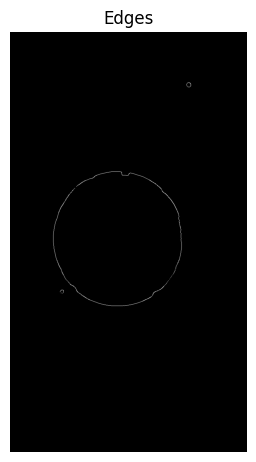

num of contours 16
max area = 144.5


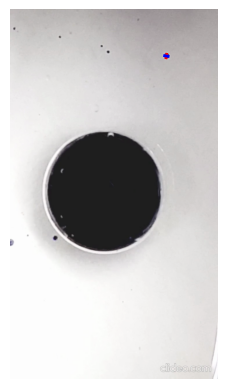

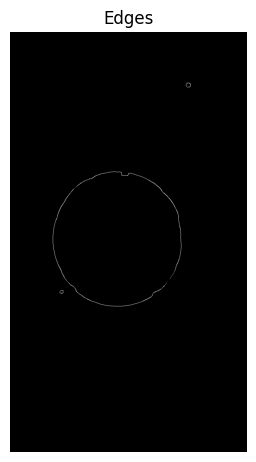

num of contours 13
max area = 138.0


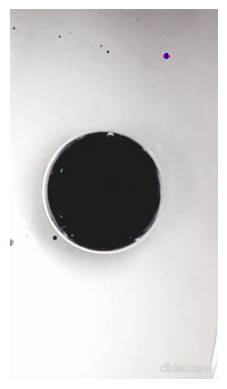

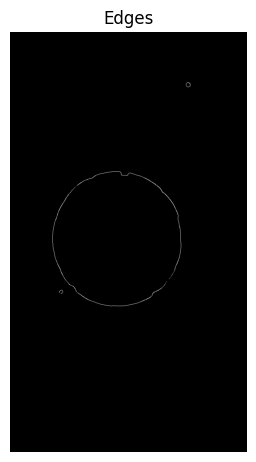

num of contours 12
max area = 131.5


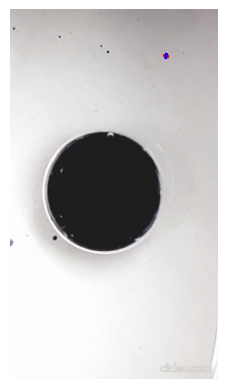

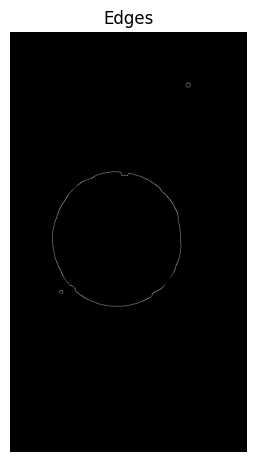

num of contours 22
max area = 134.5


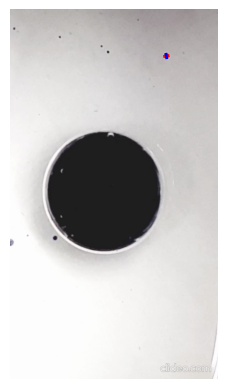

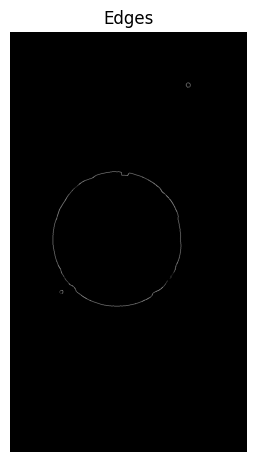

num of contours 15
max area = 139.0


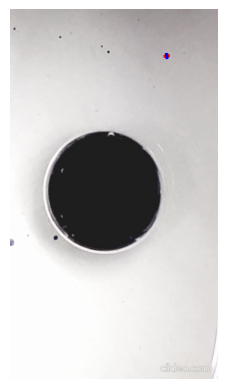

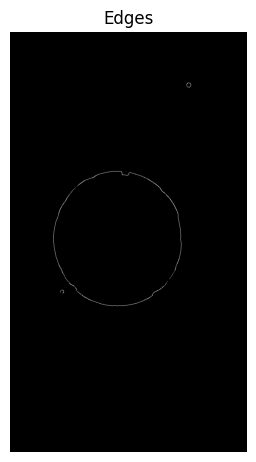

num of contours 10
max area = 143.5


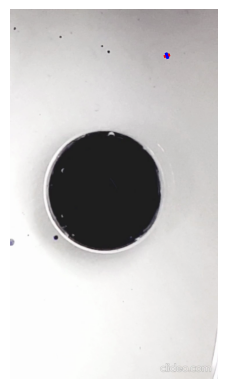

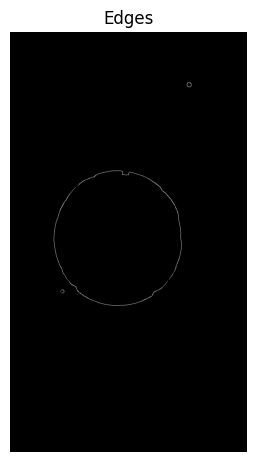

num of contours 20
max area = 139.0


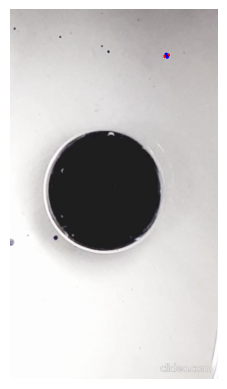

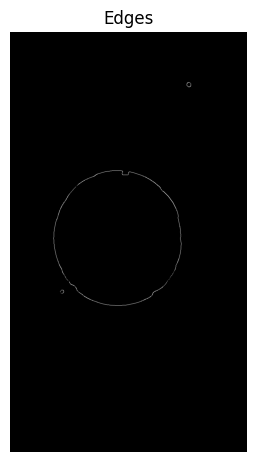

num of contours 13
max area = 137.5


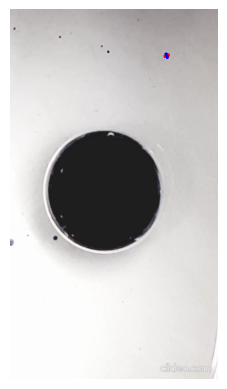

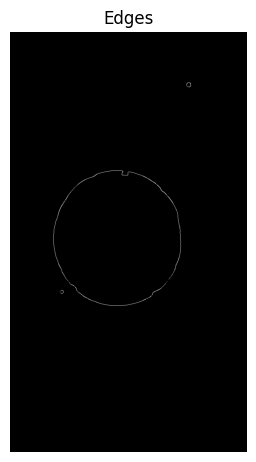

num of contours 14
max area = 140.0


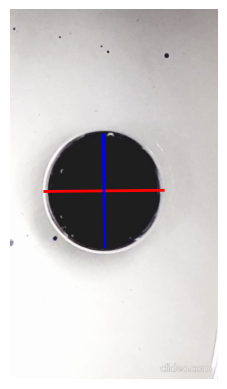

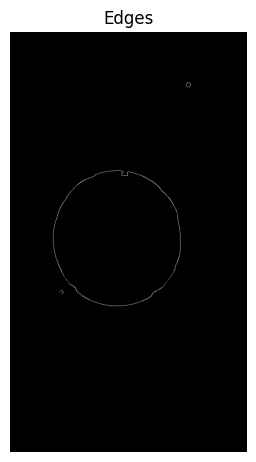

num of contours 5
max area = 148.0


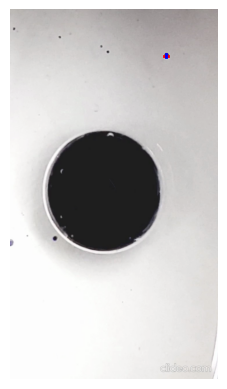

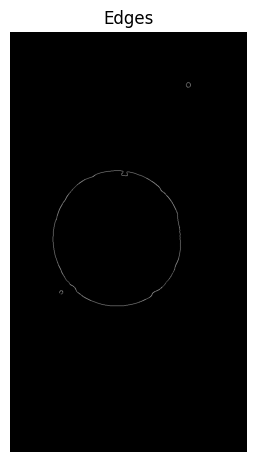

num of contours 14
max area = 146.0


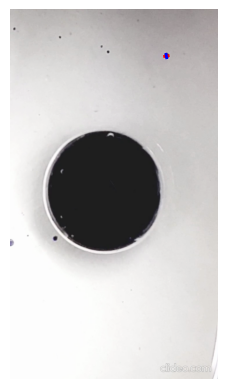

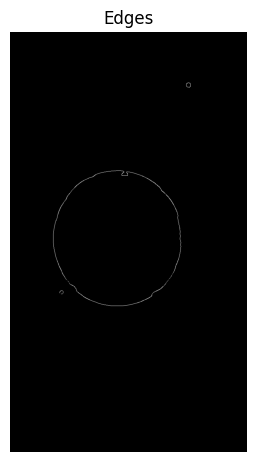

num of contours 15
max area = 146.0


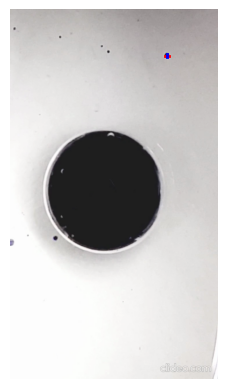

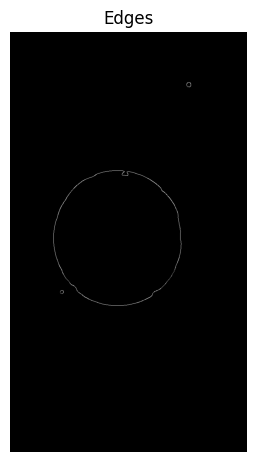

num of contours 9
max area = 147.0


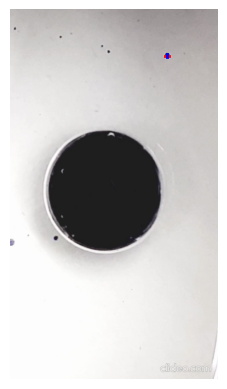

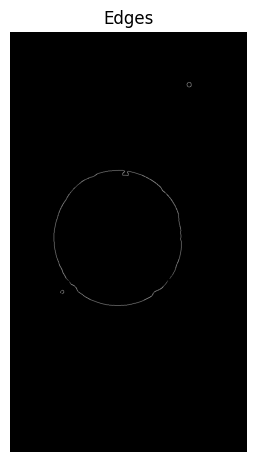

num of contours 7
max area = 148.0


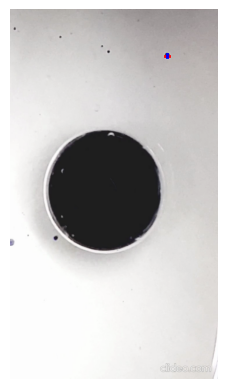

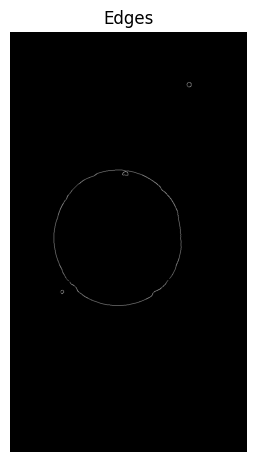

In [63]:
while True:

    ret, img = vid.read()

    if not ret or frames>=20:
        break

    imgBlur = cv2.GaussianBlur(img, (21,21), 0)

    ret, imgth = cv2.threshold(imgBlur, 100, 255, cv2.THRESH_BINARY)

    edge = cv2.Canny(imgth, 100, 150)

    contours, hierarchy = cv2.findContours(edge, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    max_area = -1
    selected_contour = None
    
    if contours:
        print(f"num of contours {len(contours)}")
        
        for contour in contours:
            area = cv2.contourArea(contour)
            if area > max_area:
                selected_contour = contour
                max_area = area
        print(f"max area = {max_area}")

        if selected_contour is not None and len(selected_contour) >= 5:  # fitEllipse requires at least 5 points
            ellipse = cv2.fitEllipse(selected_contour)
            (center, axes, angle) = ellipse
            major_axis = max(axes) / 2  # Half length of major axis
            minor_axis = min(axes) / 2  # Half length of minor axis
        
            # Calculate endpoints for major axis
            angle_rad = np.radians(angle)
            major_x = int(major_axis * np.cos(angle_rad))
            major_y = int(major_axis * np.sin(angle_rad))
            pt1_major = (int(center[0] - major_x), int(center[1] - major_y))
            pt2_major = (int(center[0] + major_x), int(center[1] + major_y))
        
            # Calculate endpoints for minor axis (perpendicular to the major axis)
            minor_x = int(minor_axis * np.cos(angle_rad + np.pi / 2))
            minor_y = int(minor_axis * np.sin(angle_rad + np.pi / 2))
            pt1_minor = (int(center[0] - minor_x), int(center[1] - minor_y))
            pt2_minor = (int(center[0] + minor_x), int(center[1] + minor_y))

            fig, ax = plt.subplots()
            ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for matplotlib
        
            # Draw the major axis in red and the minor axis in blue
            ax.plot([pt1_major[0], pt2_major[0]], [pt1_major[1], pt2_major[1]], 'r-', linewidth=2)  # Red line for major axis
            ax.plot([pt1_minor[0], pt2_minor[0]], [pt1_minor[1], pt2_minor[1]], 'b-', linewidth=2)  # Blue line for minor axis
        
            # Draw the fitted ellipse
            # ellipse_patch = plt.matplotlib.patches.Ellipse(center, axes[0], axes[1], angle, edgecolor='green', facecolor='none', linewidth=2)
            # ax.add_patch(ellipse_patch)
        
            # Display the result
            plt.axis('off')
            plt.show()
        else:
            print("Not enough points to fit an ellipse.")
            

        plt.figure(figsize=(12,12))

        # display_image(imgBlur, "Gaussian blur", subplot=222)
        # display_image(imgth, "Thresholded image", subplot=223)
        display_image(edge, "Edges", subplot=224)
        plt.show()
        
        # areas.append(ca)
        # perimeters.append(cl)
    
    frames+=1

vid.release()